# Probability distributions

In the experimental physics there are a few common probability (density) distributions that appear over and over. Let's have a look at some of them. 

In [1]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

## Binomial distribution

The first probability distribution we'll look at is the Binomial distribution. The binomial distribution describes the distribution of the number of successes ($k$) in a sequence of $n$ independent trials, where the probability of success in any trial is $p$. More generally, any sequence of experiments, each of which results in a yes/no, 1/0 or other binary result with probabilities $p$ and $q=(1-p)$ assigned to each outcome will be described by the binomial distribution, 

$$    
f(k;n,p) = \binom{n}{k} p^{k}q^{n-k},
$$

where $k$ (the number of yes, 1 etc...) $=0,1,2...n$ and  $\binom{n}{k}=\frac{n!}{k!(n-k)!}$.

The `scipy.stats.binom` distribution can be used to plot the distribution and its CDF. 

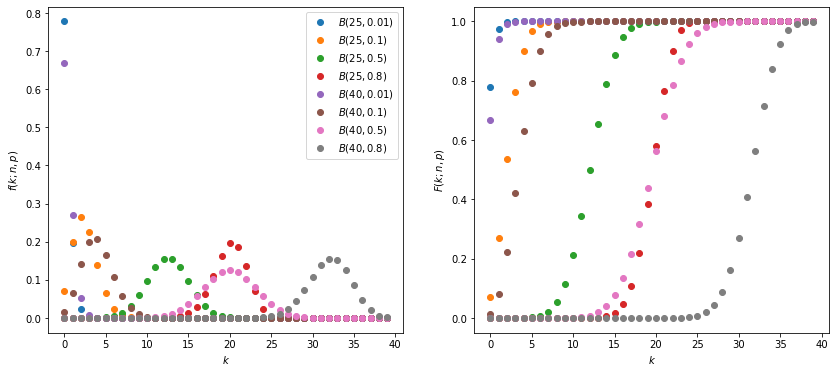

In [2]:
from scipy.stats import binom

x = range(0,40) 

# 4 different values of p and 2 different n 

ns = [25,40]
ps = [0.01,0.1,0.5,0.8]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

[[ ax1.plot(x,binom.pmf(x,n,p),label="$B(%g,%g)$"%(n,p),marker="o",linestyle='none') for p in ps ] for n in ns]
[[ ax2.plot(x,binom.cdf(x,n,p),label="$B(%g,%g)$"%(n,p),marker="o",linestyle='none') for p in ps ] for n in ns]

ax1.set_xlabel("$k$")
ax1.set_ylabel("$f(k;n,p)$")
ax2.set_xlabel("$k$")
ax2.set_ylabel("$F(k;n,p)$")

ax1.legend()

plt.savefig("binom.pdf")
plt.show()

## Poisson distribution

The next one is the Poisson distribution. Remember that this distribution is the limiting case of a binomial distribution where the parameter $\lambda=\frac{p}{N}$ stays constant as the probability for success $p\rightarrow 0$ and the number of trials $N\rightarrow \infty$.

if $k\sim \mathrm{Poisson}(\lambda)$, then

$$
f(k; \lambda) = \frac{\lambda^{k}}{k!}e^{-\lambda}
$$

The `scipy.stats.poisson` module can be used to plot this distribution and its CDF for different values of $\lambda$. 

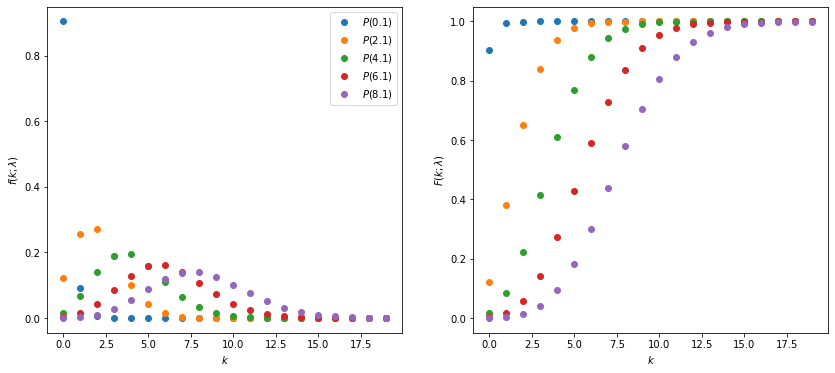

In [3]:
from scipy.stats import poisson

x = range(0,20) 
# 5 different values of \lambda
lambdas = numpy.arange(0.1,10,2.0)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

[ ax1.plot(x,poisson.pmf(x,i),label="$P(%g)$"%i,marker="o",linestyle='none') for i in lambdas ]
[ ax2.plot(x,poisson.cdf(x,i),label="$P(%g)$"%i,marker="o",linestyle='none') for i in lambdas ]

ax1.set_xlabel("$k$")
ax1.set_ylabel("$f(k;\lambda)$")
ax2.set_xlabel("$k$")
ax2.set_ylabel("$F(k;\lambda)$")

ax1.legend()
plt.savefig("poisson.pdf")
plt.show()

## Gaussian distribution

The next one for this notebook is the Gaussian (or Normal) probability density. In the lectures, we showed that for large values of the Poisson parameter $\lambda\rightarrow +\infty$, the Poisson distribution converges to a Gaussian distribution with a mean of $\mu=\lambda$ and a variance of $\sigma^{2}=\lambda$. If a random variable  $X$ is distributed as a Normal distribution $\phi(\mu,\sigma)$, then ;

$$
f(X;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{X-\mu}{\sigma}\right)^{2}}
$$

In `scipy` we can obtain the pdf and cdf of a Normal distribution using`scipy.stats.norm`.

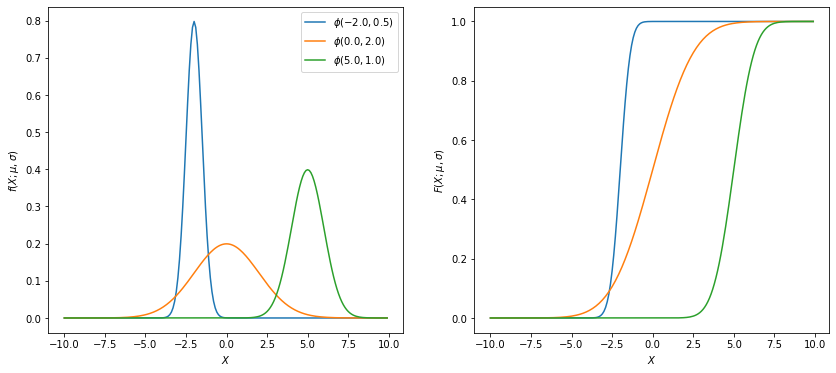

In [4]:
from scipy.stats import norm

x = numpy.arange(-10,10,0.1)
mu_range    = [-2,0,5]
sigma_range = [0.5,2,1]
# plotting
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

[ ax1.plot(x,norm.pdf(x,m,s),label="$\phi(%.1f,%.1f)$"%(m,s)) for m,s in zip(mu_range,sigma_range)]
[ ax2.plot(x,norm.cdf(x,m,s),label="$\phi(%.1f,%.1f)$"%(m,s)) for m,s in zip(mu_range,sigma_range)]

ax1.set_xlabel("$X$")
ax1.set_ylabel("$f(X;\mu,\sigma)$")
ax2.set_xlabel("$X$")
ax2.set_ylabel("$F(X;\mu,\sigma)$")

ax1.legend()
plt.savefig("gaussian.pdf")
plt.show()

## $\chi^{2}$ distribution

The $\chi^{2}$ distribution is an important distribution when applying Wilks' theorem, which is covered in the lectures. For example, if $X$ is distributed as a Normal distribution, then $X^{2}$ will be distributed as a $\chi^{2}$ with 1 degree of freedom. 

If $X\sim \chi^{2}(1)$, then 

$$
f(X;1) = \frac{1}{\sqrt{2\pi X}}  e^{-\frac{X}{2}}
$$

The `scipy.stats.chi2` module can show us this distribution for any number of degrees of freedom. 

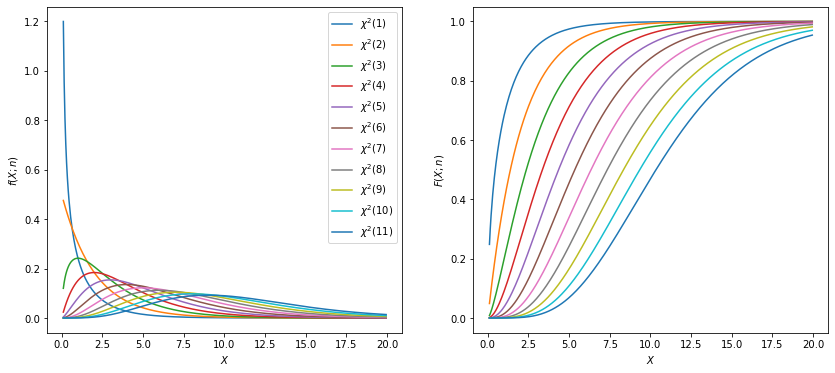

In [5]:
from scipy.stats import chi2

x = numpy.arange(0.1,20,0.05)
ndof = range(1,12,1)

# plotting
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

[ ax1.plot(x,chi2.pdf(x,i),label="$\chi^{2}(%d)$"%i) for i in ndof ]
[ ax2.plot(x,chi2.cdf(x,i),label="$\chi^{2}(%d)$"%i) for i in ndof ]

ax1.set_xlabel("$X$")
ax1.set_ylabel("$f(X;n)$")
ax2.set_xlabel("$X$")
ax2.set_ylabel("$F(X;n)$")

ax1.legend()
plt.savefig("chi2.pdf")
plt.show()

## Multivariate Gaussian

The multivariate (more than one random variable) Gaussian distribution is given by

$$
   f(\boldsymbol{X}; \boldsymbol{\mu},\mathbf{V}) = \dfrac{1}{\sqrt{(2\pi)^{N} \mathrm{det}(\mathbf{V}) }}e^{-\dfrac{1}{2} (\boldsymbol{X}-\boldsymbol{\mu})^{T}(\mathbf{V}^{-1})(\boldsymbol{X}-\boldsymbol{\mu}) }
$$

Where $\boldsymbol{X}=(X_{1},X_{2},X_{3},...,X_{N})$ is a vector of random variables (not to be confused with a sequence of random outcomes of $X$), and $\mathbf{V}$ is a $N \times N$ matrix of \emph{co-variances} $V_{ij}=\mathrm{covariance}(X_{i},X_{j})$. We'll talk about the co-variance of two random variabes later, so don't worry about it for now. 

In the special case where $N=2$, we can write, 

\begin{equation}
    \begin{split}
    & f(X,Y; \mu_X,\mu_Y,\sigma_{X},\sigma_{Y},\rho) = \\
    & \dfrac{1}{2\pi \sigma_{X}\sigma_{Y}\sqrt{1-\rho^{2}}}\mathrm{exp}\left(-\dfrac{1}{2(1-\rho^{2})} \left[ 
        \left(\dfrac{X-\mu_X}{\sigma_X}\right)^{2}+\left(\dfrac{Y-\mu_Y}{\sigma_Y}\right)^{2} - 2\rho\left(\dfrac{X-\mu_X}{\sigma_X}\right)\left(\dfrac{Y-\mu_Y}{\sigma_Y}\right) \right] \right)
    \end{split}
\end{equation}

where $X$ and $Y$ are the two random variabes and $\mu_X,\mu_Y, \sigma_X, \sigma_Y$ and $\rho$ are the parameters of the probability density function.

the `scipy` library also has this probability density function, for example, below is a plot for a multivariate gaussian with mean $\boldsymbol{\mu}=(2,7)$ and covariance matrix, 

$$
\mathbf{V} = 
\begin{pmatrix}
1.5& 0.7\\
0.7 & 1 
\end{pmatrix}	
$$

sigma_x= 1.224744871391589
sigma_y= 1.0
rho= 0.5715476066494083


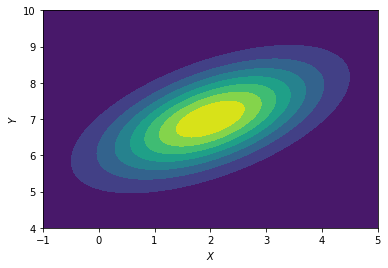

In [16]:
from scipy.stats import multivariate_normal

x = numpy.linspace(-1, 5, 100)
y = numpy.linspace(4, 10, 100)
X,Y = numpy.meshgrid(x,y)

covar_mat = [[1.5,0.7],[0.7,1]]
mvnormal = multivariate_normal(mean=[2,7], cov=covar_mat);

print("sigma_x=",covar_mat[0][0]**0.5)
print("sigma_y=",covar_mat[1][1]**0.5)
print("rho=",covar_mat[0][1]/((covar_mat[0][0]**0.5)*(covar_mat[1][1]**0.5)))

@numpy.vectorize
def multivariate_normal_pdf(x,y):
  return mvnormal.pdf([x,y])

Z = multivariate_normal_pdf(X,Y)

contours = plt.contourf(X, Y, Z)
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.savefig("multivargauss.pdf")
plt.show()


# Generating Random Numbers


We can generate random numbers according to these probability distributions. This will be very important when we get on to hypothesis tests later in the course, and in the second half of the course you'll learn more about sampling methods. For now, `scipy` and `numpy` have random number generators that we can use.

First, `numpy` can generate random numbers for several basic distributions using the `random` module ...

In [7]:
random_poisson = numpy.random.poisson(1.2,size=100)
print(random_poisson)

[1 3 1 1 0 1 2 2 3 1 2 1 1 1 1 0 1 1 0 1 0 1 2 2 2 3 0 1 0 1 2 2 0 2 2 2 0
 1 1 1 2 0 0 1 1 1 4 2 2 4 1 3 1 2 0 3 0 1 0 3 1 1 2 2 0 1 1 1 1 2 0 1 3 2
 0 1 1 2 2 2 0 0 2 3 1 0 1 1 2 3 2 1 1 2 0 2 0 0 0 1]


For more probability distributions, you can use `scipy.stats` as follows...

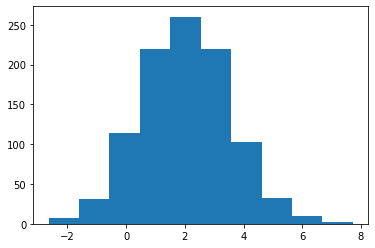

In [8]:
random_gaus = norm.rvs(loc=2,scale=1.5,size=1000)
plt.hist(random_gaus)
plt.show()

# Moments of distributions

You can calculate the moments (if they exist) of various common probability distributions directly in `scipy.stats`. 

In [9]:
mean, var, skew = binom.stats(15, 0.4, moments='mvs')
print(mean,var,skew)

mean, var, skew = poisson.stats(2, moments='mvs')
print(mean,var,skew)

mean, var, skew = norm.stats(3, 2, moments='mvs')
print(mean,var,skew)

6.0 3.5999999999999996 0.10540925533894596
2.0 2.0 0.7071067811865476
3.0 4.0 0.0
